In [3]:
%reload_ext autoreload
%autoreload 2
import copy
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams,gridspec,ticker
import time
from tqdm import tqdm
import copy
import sys
sys.path.append("/home/yjsun/alpha_dataserver")
import DataServer as ds

In [4]:
%reload_ext autoreload
%autoreload 2
import AlphaBackTest as abt

In [59]:
start_date = "20220101"
# start_date = "20211015"
end_date = "20221016"
# end_date = "20211130"
spot_data_dict, future_data_dict = abt.get_prepared_kline_from_basic_data(start_date,end_date,basic_data_path = "/share/alpha_data/basic_data_AlphaFM")
funding_data = future_data_dict['fundingRate']
del future_data_dict['fundingRate']
future_tickers = ['1000SHIBUSDT', '1000XECUSDT', '1INCHUSDT', 'AAVEUSDT', 'ADAUSDT', 'AKROUSDT', 'ALGOUSDT', 'ALICEUSDT', 'ALPHAUSDT', 'ANKRUSDT', 'ARUSDT', 'ATAUSDT', 'ATOMUSDT', 'AUDIOUSDT', 'AVAXUSDT', 'AXSUSDT', 'BAKEUSDT', 'BALUSDT', 'BANDUSDT', 'BATUSDT', 'BCHUSDT', 'BELUSDT', 'BLZUSDT', 'BNBUSDT', 'BTCUSDT', 'BTSUSDT', 'C98USDT', 'CELOUSDT', 'CELRUSDT', 'CHRUSDT', 'CHZUSDT', 'COMPUSDT', 'COTIUSDT', 'CRVUSDT', 'CTKUSDT', 'CVCUSDT', 'DASHUSDT', 'DENTUSDT', 'DGBUSDT', 'DODOUSDT', 'DOGEUSDT', 'DOTUSDT', 'DYDXUSDT', 'EGLDUSDT', 'ENJUSDT', 'EOSUSDT', 'ETCUSDT', 'ETHUSDT', 'FILUSDT', 'FLMUSDT', 'FTMUSDT', 'GALAUSDT', 'GRTUSDT', 'GTCUSDT', 'HBARUSDT', 'HNTUSDT', 'HOTUSDT', 'ICPUSDT', 'ICXUSDT', 'IOSTUSDT', 'IOTAUSDT', 'IOTXUSDT', 'KAVAUSDT', 'KNCUSDT', 'KSMUSDT', 'LINAUSDT', 'LINKUSDT', 'LITUSDT', 'LRCUSDT', 'LTCUSDT',  'MANAUSDT', 'MASKUSDT', 'MATICUSDT', 'MKRUSDT', 'MTLUSDT', 'NEARUSDT', 'NEOUSDT', 'NKNUSDT', 'OCEANUSDT', 'OGNUSDT', 'OMGUSDT', 'ONEUSDT', 'ONTUSDT', 'QTUMUSDT', 'RAYUSDT', 'REEFUSDT', 'RENUSDT', 'RLCUSDT', 'RSRUSDT', 'RUNEUSDT', 'RVNUSDT', 'SANDUSDT', 'SCUSDT', 'SFPUSDT', 'SKLUSDT', 'SNXUSDT', 'SOLUSDT', 'SRMUSDT', 'STMXUSDT', 'STORJUSDT', 'SUSHIUSDT', 'SXPUSDT', 'THETAUSDT', 'TLMUSDT', 'TOMOUSDT', 'TRBUSDT', 'TRXUSDT', 'UNFIUSDT', 'UNIUSDT', 'VETUSDT', 'WAVESUSDT', 'XEMUSDT', 'XLMUSDT', 'XMRUSDT', 'XRPUSDT', 'XTZUSDT', 'YFIUSDT', 'ZECUSDT', 'ZENUSDT', 'ZILUSDT', 'ZRXUSDT','GMTUSDT', 'APEUSDT', 'PEOPLEUSDT', 'WOOUSDT']

In [4]:
close = future_data_dict['close'].copy(deep=True)
del spot_data_dict
del future_data_dict

{'AnnRtn': 0.9332697810386062, 'DailyStd': 0.007629879040357326, 'Sharp': 6.44671246616601, 'TvrRate': 4.628778844729723, 'WinRatio': 0.6590909090909091, 'MaxDD': 0.03470864868454915, 'Max24HDD': 0.02654886747423955, 'Max24HDDTime': '2023-02-07', '24hdd_001': 0.36363636363636365, '24hdd_0015': 0.10227272727272728, '24hdd_002': 0.03409090909090909, 'dd24h_qt50': 0.007993404671685536, '24hdd_qt95': 0.01842061019016214, '24hdd_qt99': 0.023950215296594173, 'Max1HDD': 0.011014148882176262, 'Max1HDDTime': '2023-03-14', 'LSVolStyle': -0.9184559922144788, 'LSMomStyle': -1.2111471781982157, 'consecutive_dd': 5, 'consecutive_dd_day': '2023-03-03'}
Drawdown 0.025 dates ['2023-02-07']


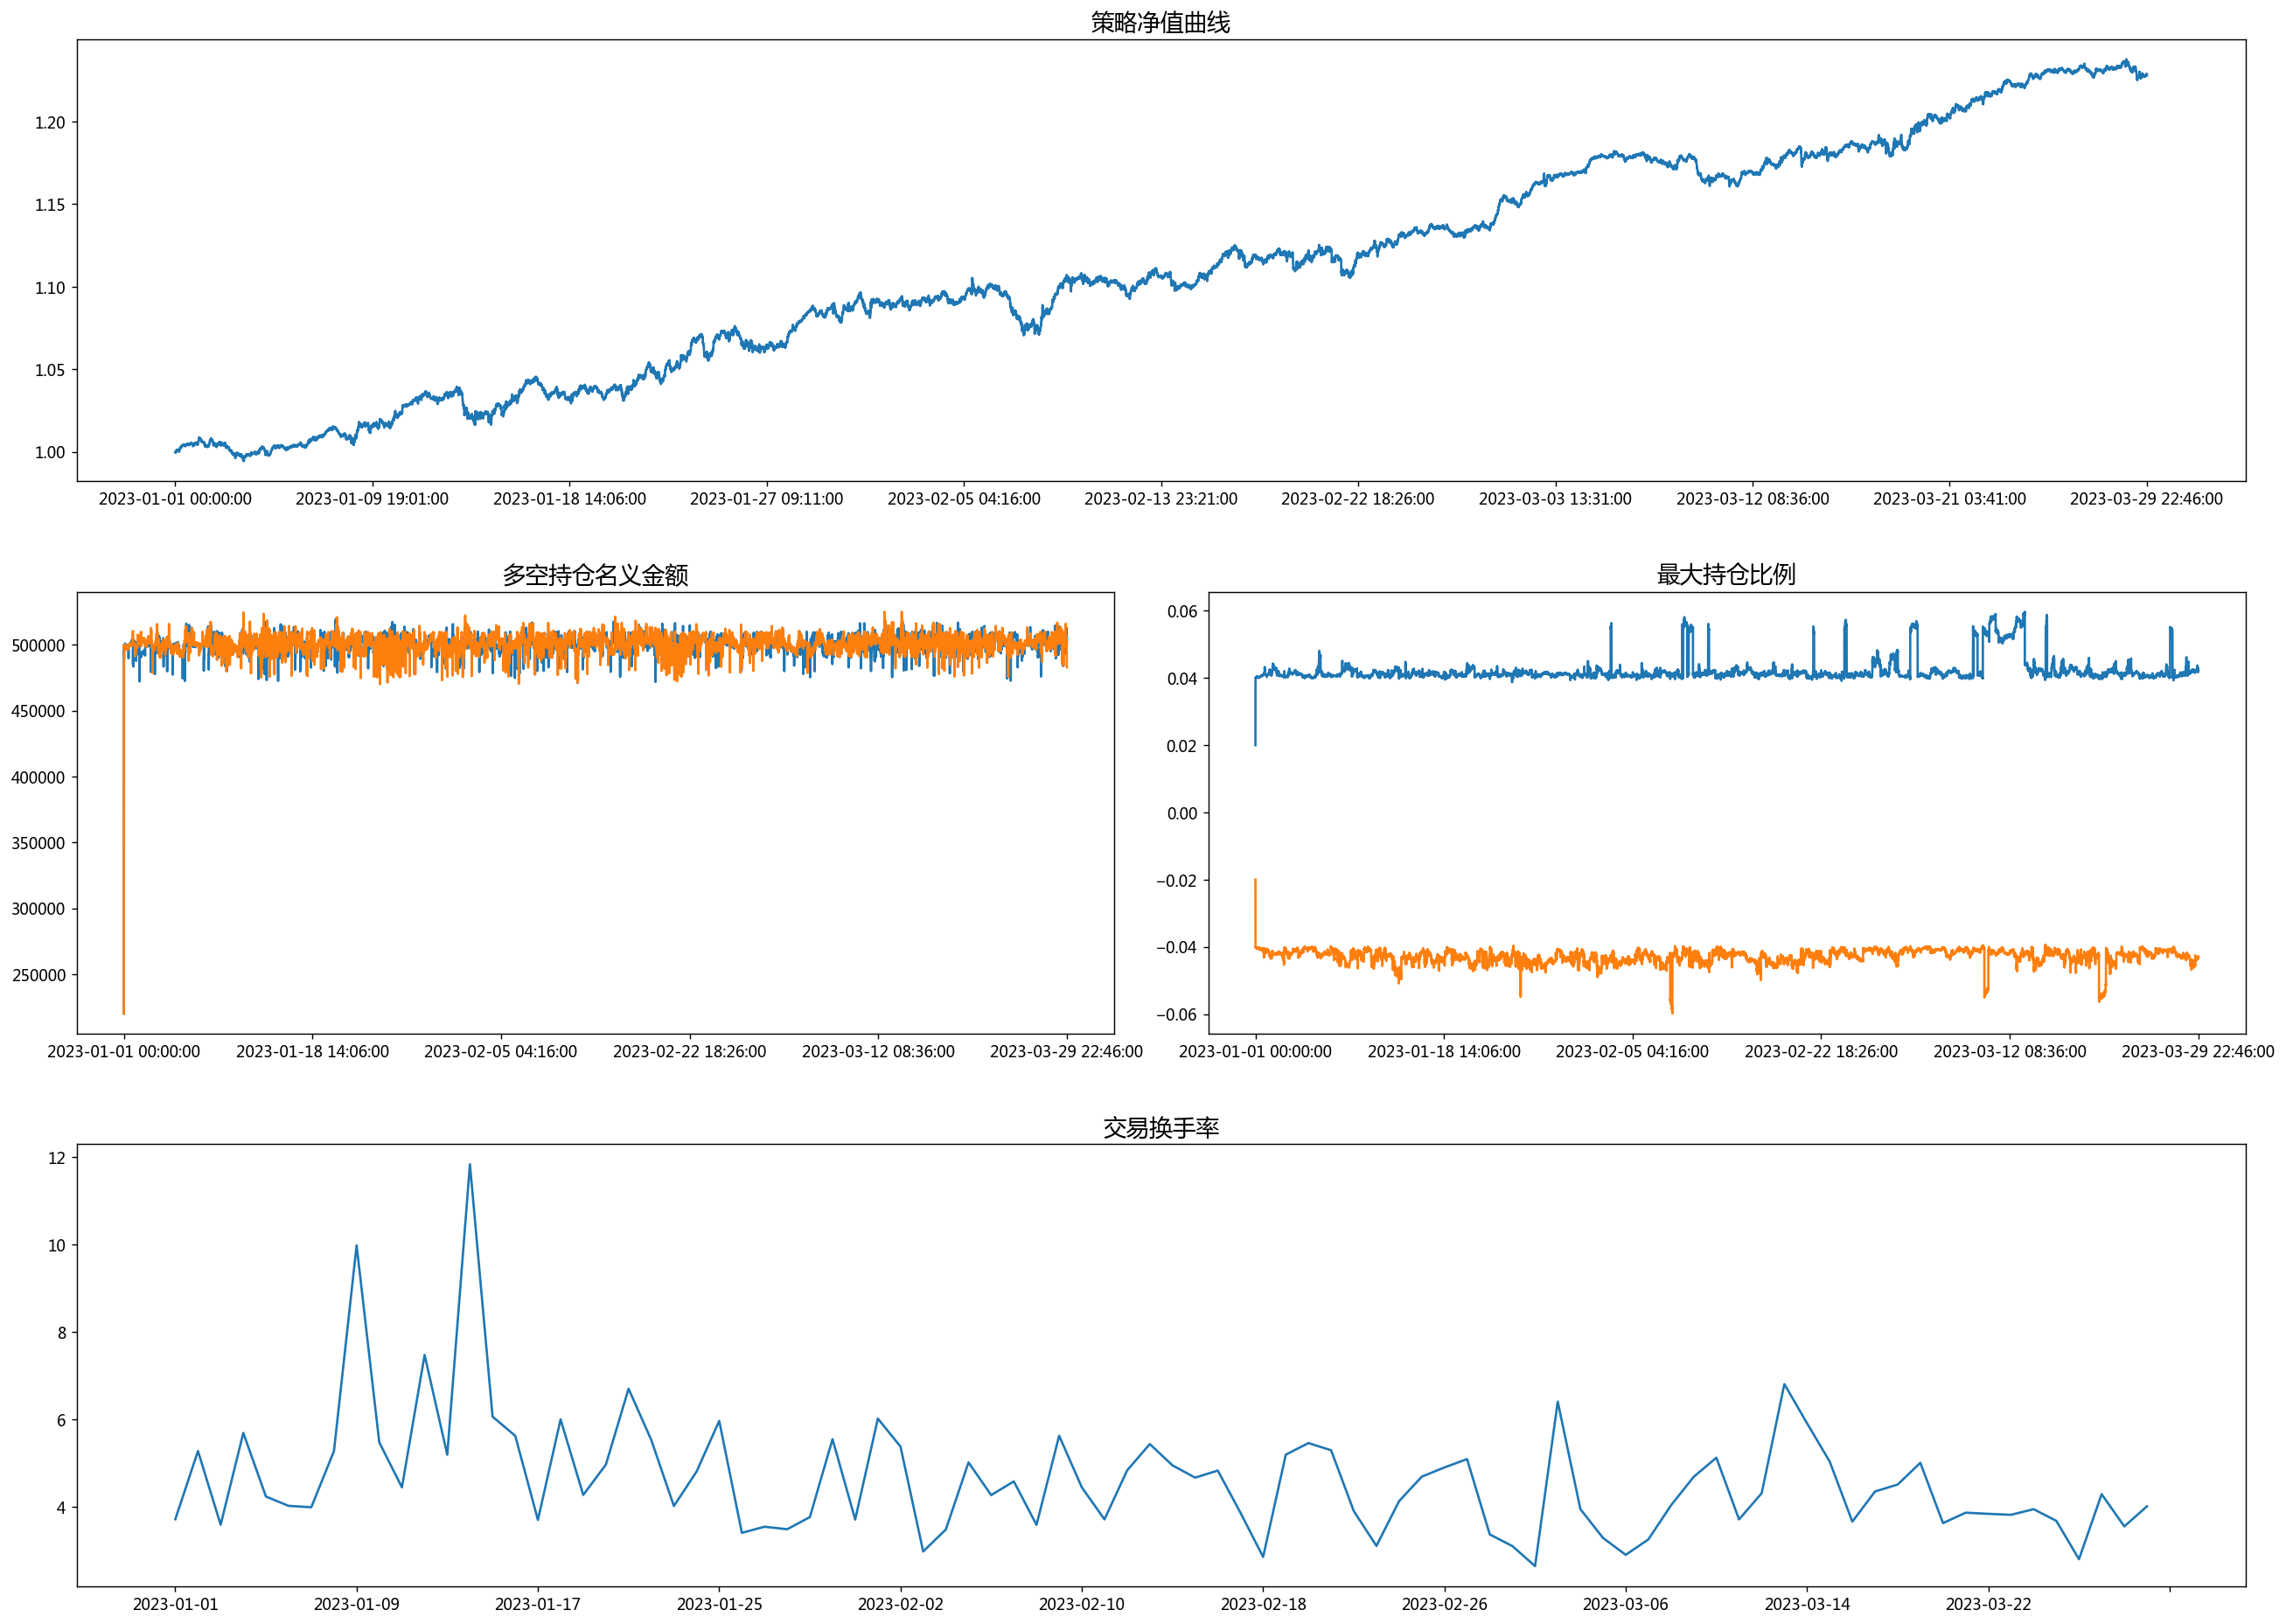

In [8]:
LogPath = "/home/yjsun/alpha_backtest/MarkStrategy/P60_FMV5_9model/log"
Capital_t0, Accdf, Tradedf ,Other = abt.read_trading_log(LogPath, my_pid = None)
res = abt.plot_strategy_backtest(Capital_t0, Accdf, Tradedf,Other)